In [6]:
import pandas as pd
import ast
from scipy.stats import rankdata
import seaborn as sns

results_paths = [
	'coarse_gs_results_giulia1.csv',
	'coarse_gs_results_giulia800_1.csv',
 	'coarse_gs_results_giulia800_2.csv',
 	'coarse_gs_results_giulia800_3.csv',
 	'coarse_gs_results_giulia800_4.csv',
	'coarse_gs_results_irene1.csv',
	'coarse_gs_results_irene2.csv',
	'coarse_gs_results_lorenzo1.csv',
 	'coarse_gs_results_lorenzo2.csv',
	'coarse_gs_results_lorenzo3.csv',
	'coarse_gs_results_lorenzo4.csv',
	'coarse_gs_results_lorenzo5.csv'
]
MEE = 'MEE'
MSE = 'MSE'
K = 3

# concatenate results into a single dataframe
scores_df = pd.DataFrame(columns=[])
for path in results_paths:
	partial_scores_df = pd.read_csv(path, sep=",")
	scores_df = pd.concat([scores_df, partial_scores_df], ignore_index=True)

########### SWAP COLUMNS ##########

# NOTE: delete for the fine grid search!

# val_mee_mean <--> val_mse_mean
# val_mee_dev <--> val_mse_dev
# splitX_val_mee <--> split0_val_mse

scores_df = scores_df.rename(
	columns = {
	"val_mee_mean": "val_MSE_mean",
	"val_mee_dev": "val_MSE_dev",
	"split0_val_mee": "split0_val_MSE",
	"split1_val_mee": "split1_val_MSE",
	"split2_val_mee": "split2_val_MSE",
	"val_mse_mean" : "val_MEE_mean",
	"val_mse_dev" : "val_MEE_dev",
	"split0_val_mse" : "split0_val_MEE",
	"split1_val_mse" : "split1_val_MEE",
	"split2_val_mse" : "split2_val_MEE"
	}
)

###########################################

# rank results
scores_df['val_%s_mean_rank'%MEE] = rankdata(scores_df['val_%s_mean'%MEE], method='dense')
scores_df['val_%s_mean_rank'%MSE] = rankdata(scores_df['val_%s_mean'%MSE], method='dense')
scores_df['tr_mee_mean_rank'] = rankdata(scores_df['tr_mee_mean'], method='dense')
scores_df['tr_mse_mean_rank'] = rankdata(scores_df['tr_mse_mean'], method='dense')

# sort results by 'val_score_mean_rank'
scores_df = scores_df.sort_values(by=['val_%s_mean_rank'%MEE], ignore_index=True)
scores_df.drop(scores_df.columns[0], axis=1, inplace=True)

columns_order = [
	'val_%s_mean_rank'%MSE,
	'val_%s_mean'%MSE,
	'val_%s_dev'%MSE,
	'val_%s_mean_rank'%MEE,
	'val_%s_mean'%MEE,
	'val_%s_dev'%MEE,
	'tr_mse_mean_rank',
	'tr_mse_mean',
	'tr_mse_dev',
	'tr_mee_mean_rank',
	'tr_mee_mean',
	'tr_mee_dev',
]
for i in range(K):
	columns_order.append('split%d_val_%s'%(i, MSE))
	columns_order.append('split%d_val_%s'%(i, MEE))
	columns_order.append('split%d_tr_mse'%(i))
	columns_order.append('split%d_tr_mee'%(i))
	columns_order.append('split%d_best_epoch'%(i))
columns_order.append('params')
scores_df = scores_df[columns_order]

# write params as csv deleting fixed params
rem_list = [ 
	'activation_out',
	'classification',
	'early_stopping',
	'evaluation_metric',
	'loss',
	'metric_decrease_tol',
	'random_state',
	'reinit_weights',
	'stopping_patience',
	'tau',
	'tol',
	'validation_size',
	'verbose',
	'weights_bound',
	'weights_dist'
	]
params_df = pd.DataFrame(columns=[])
for param in scores_df['params']: # TODO: fare in modo migliore?
	params_dict = ast.literal_eval(param)
	for key in rem_list:
		del params_dict[key]
		params_dict['batch_size'] = str(params_dict['batch_size'])
	params_df = pd.concat([params_df, pd.DataFrame([params_dict])], ignore_index=True)


params_df['val_MEE_mean'] = scores_df['val_MEE_mean']
params_df

hidden_layer_sizes = []
for i in range(1656):
	if (params_df['hidden_layer_sizes'][i]) == [30, 30, 30]:
		hidden_layer_sizes.append('3layer30')
	elif (params_df['hidden_layer_sizes'][i]) == [30, 30]:
		hidden_layer_sizes.append('2layer30')
	else:
		hidden_layer_sizes.append('2layer60')
params_df['hidden'] = hidden_layer_sizes
params_df

KeyError: 1449

<AxesSubplot:xlabel='hidden', ylabel='alpha'>

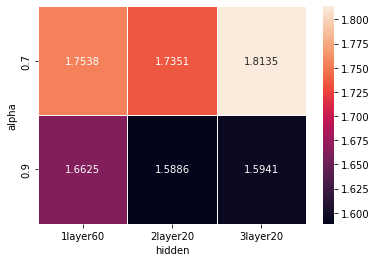

In [55]:
pvt_k = pd.pivot_table(
        params_df, 
        values='val_MEE_mean', 
        index='alpha',
        columns='hidden'
    )
sns.heatmap(pvt_k, annot=True, fmt=".4f", linewidths=.5)

<AxesSubplot:xlabel='lambd', ylabel='alpha'>

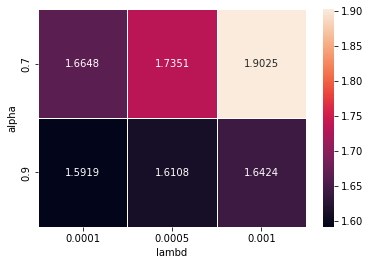

In [24]:
pvt_k = pd.pivot_table(
        params_df, 
        values='val_MEE_mean', 
        index='alpha',
        columns='lambd'
    )
sns.heatmap(pvt_k, annot=True, fmt=".4f", linewidths=.5)


<AxesSubplot:xlabel='learning_rate_init', ylabel='alpha'>

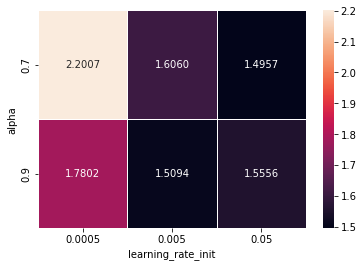

In [26]:
pvt_k = pd.pivot_table(
        params_df, 
        values='val_MEE_mean', 
        index='alpha',
        columns='learning_rate_init'
    )
sns.heatmap(pvt_k, annot=True, fmt=".4f", linewidths=.5)

<AxesSubplot:xlabel='lambd', ylabel='hidden'>

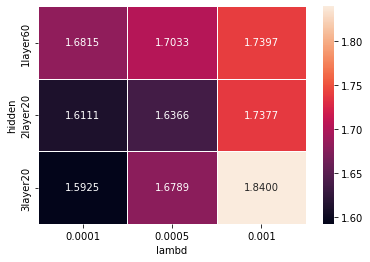

In [56]:
pvt_k = pd.pivot_table(
        params_df, 
        values='val_MEE_mean', 
        index='hidden',
        columns='lambd'
    )
sns.heatmap(pvt_k, annot=True, fmt=".4f", linewidths=.5)

<AxesSubplot:xlabel='learning_rate_init', ylabel='hidden'>

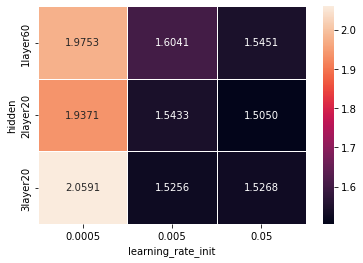

In [59]:
pvt_k = pd.pivot_table(
        params_df, 
        values='val_MEE_mean', 
        index='hidden',
        columns='learning_rate_init'
    )
sns.heatmap(pvt_k, annot=True, fmt=".4f", linewidths=.5)

<AxesSubplot:xlabel='learning_rate_init', ylabel='lambd'>

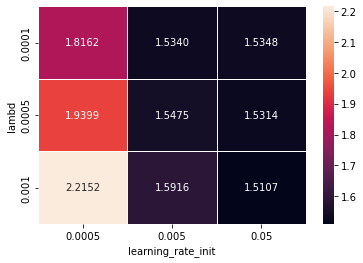

In [28]:
pvt_k = pd.pivot_table(
        params_df, 
        values='val_MEE_mean', 
        index='lambd',
        columns='learning_rate_init'
    )
sns.heatmap(pvt_k, annot=True, fmt=".4f", linewidths=.5)